In [1]:
import numpy as np
import pandas as pd

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib

from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
from pathlib import Path

import json

In [4]:
path = Path('/home/jupyter/insight_project/Project-M/data/raw')

In [5]:
filenames = [x for x in list(path.iterdir())]

In [6]:
one_file = filenames[0]

In [7]:
with open(one_file, 'r') as f:
        obj = json.load(f)

In [8]:
test_embedding = obj['data_points'][0]['embedding']

In [9]:
a = np.array(test_embedding)

In [10]:
b = np.array(obj['data_points'][1]['embedding'])

In [11]:
a.shape,b.shape

((768,), (768,))

In [12]:
np.stack([a,b],axis=0).shape

(2, 768)

In [13]:
test = []
test.append(a)
test.append(b)

In [14]:
np.stack(test).shape

(2, 768)

In [15]:
test = []
for i in range(len(obj['data_points'])):
    #if obj['data_points'][i]['label'] == 0:
    test.append(obj['data_points'][i]['embedding'])
one_emb = np.stack(test)

In [16]:
one_emb.shape

(222, 768)

In [17]:
filenames[0]

PosixPath('/home/jupyter/insight_project/Project-M/data/raw/841123a9-67ad-43aa-822b-64d7d82a6692.json')

In [18]:
path_test = Path('/home/jupyter/insight_project/Project-M/data/preprocessed/csv/841123a9-67ad-43aa-822b-64d7d82a6692.csv')

In [19]:
df = pd.read_csv(path_test)
df.head()

,Body,Label,Source
0,@desperosolace @yu_malaya I agree! It's ridicu...,1,twitter
1,@yu_malaya it's total BS!!! i hate this so muc...,1,twitter
2,@owedbetter_ I wanted to withdraw my applicati...,1,twitter
3,Good question. My situation was a bit differen...,0,reddit
4,"""Like me, you can also achieve your IELTS band...",0,twitter


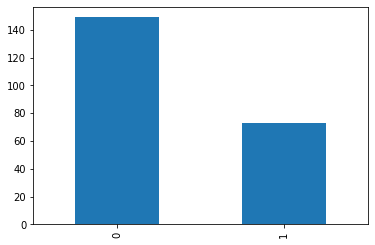

In [20]:
df['Label'].value_counts().plot(kind='bar')

In [21]:
labels = df['Label'].values

# Test knn

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

In [23]:
body, label, source, emb = [], [], [], []
with open(filenames[0]) as file:
    data = json.load(file)
for item in data['data_points']:
    body.append(item['body'])
    label.append(item['label'])
    source.append(item['source'])
    emb.append(item['embedding'])
df = pd.DataFrame(list(zip(body, label, source, emb)),
                     columns = ['Body', 'Label', 'Source', 'Emb'])

In [25]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
i = round(df.shape[0] * 0.7)
df_train = df[:i]
df_valid = df[i:]

In [54]:
test = []
for i in df_train['Emb'].values:
    i = np.array(i)
    test.append(i)

In [55]:
np.array(test).shape

(155, 768)

In [56]:
np_train_x = np.array(test)

In [57]:
np_train_y = np.array(df_train['Label'].values)

In [58]:
%%time 
neigh.fit(np_train_x,np_train_y)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 14 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
preds = neigh.predict(valid_emb)

In [74]:
valid_emb = []
for i in df_valid['Emb'].values:
    i = np.array(i)
    valid_emb.append(i)

In [75]:
valid_emb = np.array(valid_emb)
valid_emb.shape

(67, 768)

In [76]:
valid_emb[0].reshape(1,-1).shape

(1, 768)

In [77]:
gt = np.array(df_valid['Label'].values)

In [80]:
gt.shape,preds.shape

((67,), (67,))

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(gt,preds)

0.6119402985074627

In [74]:
pca = PCA(100)
pca_vectors = pca.fit_transform(one_emb)

In [87]:
pca_vectors.shape

(222, 100)

In [75]:
for idx,var in enumerate(pca.explained_variance_ratio_):
    print((idx+1),': ',var)

1 :  0.5806453054157067
2 :  0.136052790038156
3 :  0.02649710324808675
4 :  0.023459682805814328
5 :  0.021319413325024118
6 :  0.01651880893878961
7 :  0.010923110696698728
8 :  0.010039678125845455
9 :  0.008601146354988832
10 :  0.0078017403173152155
11 :  0.0068466293550254334
12 :  0.006579277930479474
13 :  0.0062589072027982705
14 :  0.005175617295231244
15 :  0.004907100136286959
16 :  0.0047448747141546205
17 :  0.004390429768497821
18 :  0.00416924536060143
19 :  0.0038922128723014628
20 :  0.003644712126579733
21 :  0.0035344132759258596
22 :  0.003301752897070765
23 :  0.003057334685174182
24 :  0.00284897331273614
25 :  0.0028057571424256627
26 :  0.0025166235626732977
27 :  0.00243009394068123
28 :  0.0023752347795941865
29 :  0.0022188495989403467
30 :  0.002082677567615617
31 :  0.001961008356976935
32 :  0.0019013234371343384
33 :  0.0018611469949971569
34 :  0.0018280554624431212
35 :  0.001757305677084105
36 :  0.001720144684860789
37 :  0.001663219473412488
38 :  0

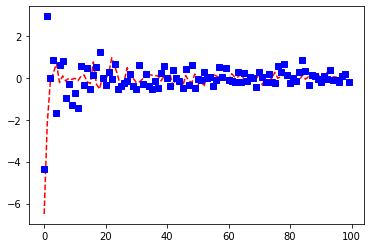

In [98]:
plt.plot(pca_vectors[0],'r--',pca_vectors[3],'bs')

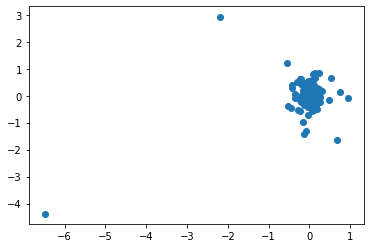

In [79]:
plt.scatter(pca_vectors[0],pca_vectors[3])

In [83]:
sum(pca.explained_variance_ratio_[:10])

0.8418587792664257

In [190]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [191]:
vectorizer = CountVectorizer(stop_words='english')

In [196]:
vectors = vectorizer.fit_transform(df['Body'].values).todense()

In [197]:
vectors.shape

(222, 2934)

In [199]:
vocab = np.array(vectorizer.get_feature_names())

In [200]:
vocab.shape

(2934,)

In [201]:
vocab[700:720]

array(['daughter', 'dave', 'davidthewhiter1', 'day', 'days', 'deal',
       'death', 'decade', 'decades', 'decent', 'decide', 'decided',
       'decision', 'deer', 'defeated', 'defense', 'deferral',
       'definitely', 'defqqkhvtx', 'degree'], dtype='<U32')

In [202]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 76 ms, sys: 4 ms, total: 80 ms
Wall time: 77 ms


In [203]:
U.shape,s.shape,Vh.shape

((222, 222), (222,), (222, 2934))

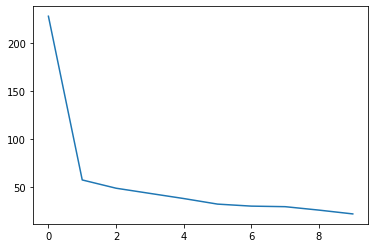

In [205]:
plt.plot(s[:10])

In [206]:
pca = PCA(n_components=2)
test_input = pca.fit_transform(vectors)

In [207]:
test_input.shape

(222, 2)

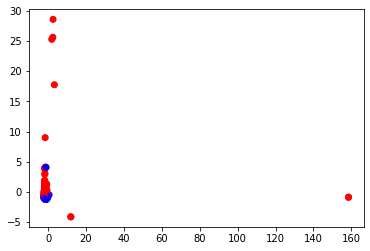

In [208]:
%matplotlib inline
plt.scatter(test_input[:,0],test_input[:,1],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

In [33]:
from sklearn.decomposition import PCA

In [137]:
scaler = StandardScaler(with_std=True)
nor_one_emb = scaler.fit_transform(one_emb)
pca = PCA(n_components=50)
test = pca.fit_transform(nor_one_emb)

In [138]:
test.shape

(222, 50)

In [142]:
one_emb_pca_tsne = TSNE(n_components=3).fit_transform(test)
one_emb_pca_tsne.shape

(222, 3)

In [157]:
test_1 = []
for i in range(len(obj['data_points'])):
    test_1.append(obj['data_points'][i]['label'])
labels = np.stack(test_1)

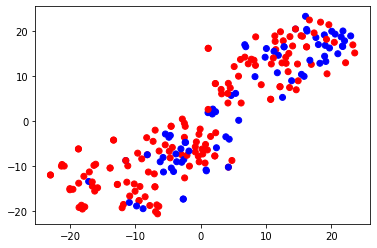

In [141]:
%matplotlib inline
plt.scatter(one_emb_pca_tsne[:,0],one_emb_pca_tsne[:,1],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

<IPython.core.display.Javascript object>


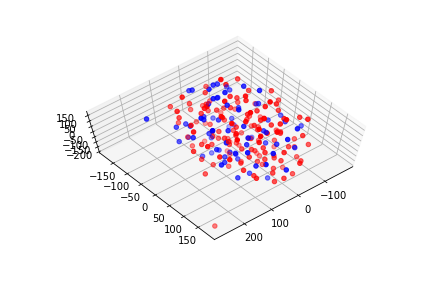

In [143]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(one_emb_pca_tsne[:,0],one_emb_pca_tsne[:,1],one_emb_pca_tsne[:,2],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

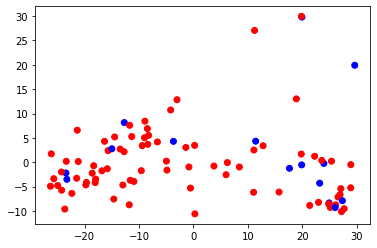

In [117]:
%matplotlib inline
plt.scatter(test[:,0],test[:,1],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

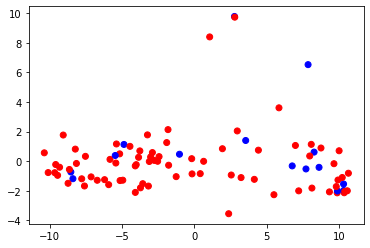

In [118]:
#test_2 = []
test_2 = pca.fit_transform(one_emb)
plt.scatter(test_2[:,0],test_2[:,1],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

In [80]:
from sklearn.manifold import TSNE

In [119]:
tsne_emb = TSNE(n_components=2).fit_transform(one_emb)
tsne_emb.shape

(91, 2)

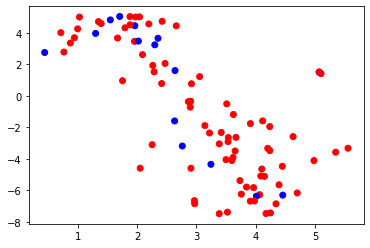

In [120]:
plt.scatter(tsne_emb[:,0],tsne_emb[:,1],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

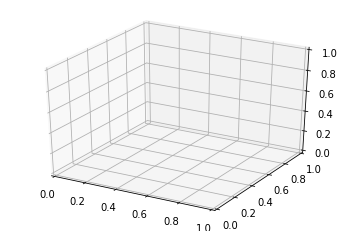

In [121]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [122]:
tsne_emb = TSNE(n_components=3).fit_transform(one_emb)
tsne_emb.shape

(91, 3)

<IPython.core.display.Javascript object>


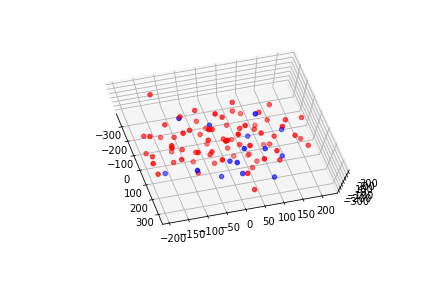

In [123]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_emb[:,0],tsne_emb[:,1],tsne_emb[:,2],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

In [124]:
scaler = StandardScaler(with_std=True)
nor_one_emb = scaler.fit_transform(one_emb)
pca_3d = PCA(n_components=3)
test_3d = pca_3d.fit_transform(nor_one_emb)

<IPython.core.display.Javascript object>


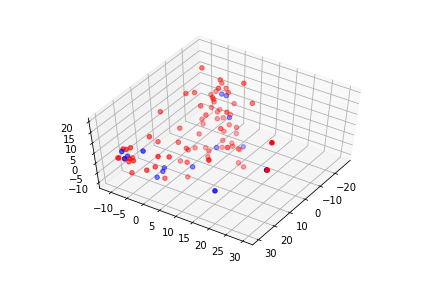

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_3d[:,0],test_3d[:,1],test_3d[:,2],c=labels,cmap=matplotlib.colors.ListedColormap(['red','blue']))

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)